In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv("car_price_prediction.csv")

In [3]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [6]:
df.shape

(19237, 18)

In [7]:
df.size

346266

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [9]:
df['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64

In [10]:
df['Model'].value_counts()

Model
Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: count, Length: 1590, dtype: int64

In [11]:
df.drop('ID',axis=1,inplace=True)

In [12]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [13]:
print(df.duplicated().sum())

3512


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
print(df.duplicated().sum())

0


In [16]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4


In [17]:
df['Levy']=df['Levy'].replace('-','0')
df['Levy']=df['Levy'].astype('int')
df['Levy'].info()

<class 'pandas.core.series.Series'>
Index: 15725 entries, 0 to 19236
Series name: Levy
Non-Null Count  Dtype
--------------  -----
15725 non-null  int32
dtypes: int32(1)
memory usage: 184.3 KB


In [18]:
df['Engine volume']=df['Engine volume'].str.replace('Turbo','')
df['Engine volume']=df['Engine volume'].astype('float64')
df['Engine volume'].info()

<class 'pandas.core.series.Series'>
Index: 15725 entries, 0 to 19236
Series name: Engine volume
Non-Null Count  Dtype  
--------------  -----  
15725 non-null  float64
dtypes: float64(1)
memory usage: 245.7 KB


In [19]:
df['Mileage']=df['Mileage'].str.replace('km','')
df['Mileage']=df['Mileage'].astype('int')

In [20]:
df['Cylinders']=df['Cylinders'].astype('object')
df['Airbags']=df['Airbags'].astype('object')

In [21]:
df['Doors']=df['Doors'].replace("04-May","4")
df['Doors']=df['Doors'].replace("02-Mar","2")
df['Doors']=df['Doors'].replace(">5","5")

In [22]:
import datetime as dt
dtime=dt.datetime.now()
df['Age']=dtime.year - df['Prod. year']
df=df.drop('Prod. year',axis=1)

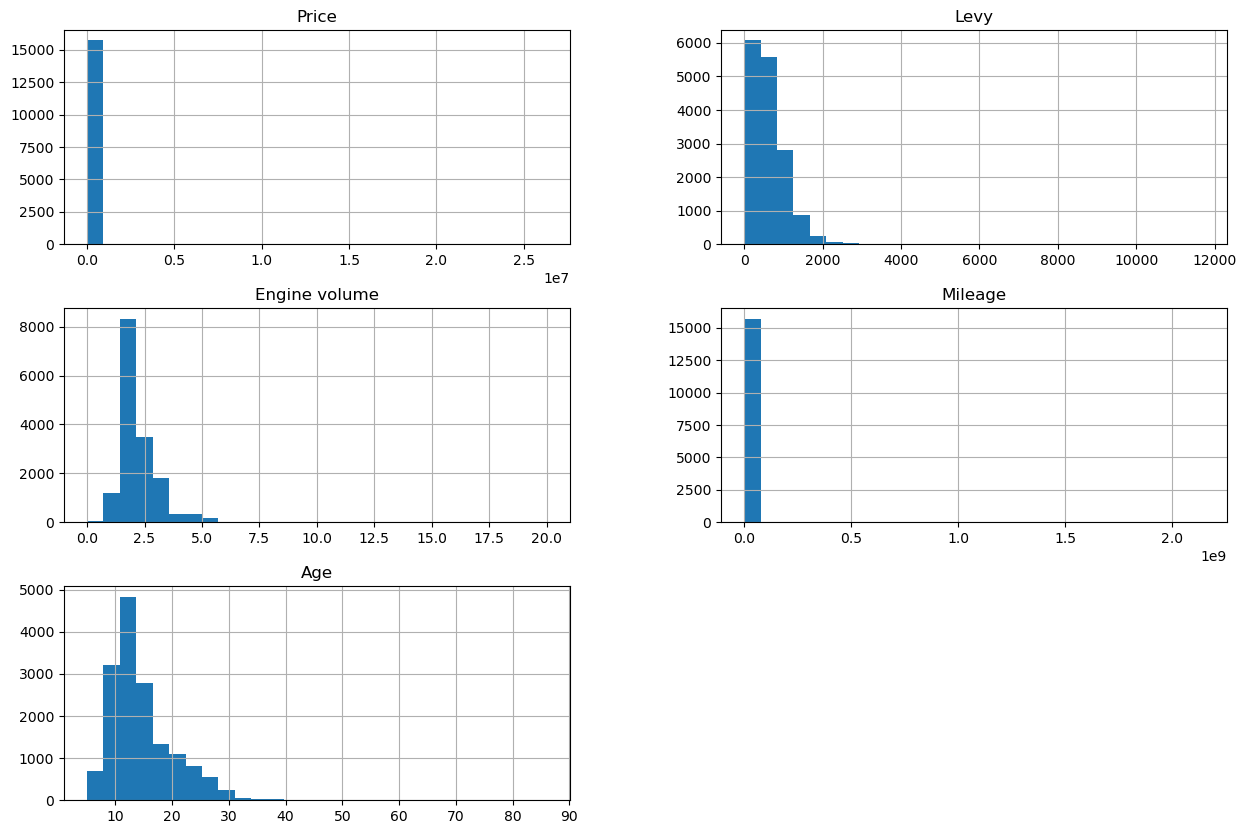

In [23]:
df.hist(bins=28,figsize=(15,10))
plt.show()

In [24]:
top_20_car=df.Manufacturer.value_counts().head(20)
top_20_car

Manufacturer
HYUNDAI          3050
TOYOTA           2863
MERCEDES-BENZ    1451
CHEVROLET         968
FORD              956
BMW               924
HONDA             881
NISSAN            594
VOLKSWAGEN        556
LEXUS             421
SSANGYONG         415
KIA               410
OPEL              396
MITSUBISHI        288
SUBARU            227
AUDI              194
MAZDA             141
JEEP              138
DODGE              89
FIAT               76
Name: count, dtype: int64

In [25]:
l=[]
j=0
for i in df['Manufacturer']:
    if i in top_20_car:
        l.append(i)
    else:
        l.append('other')
        #j=j+1
        #print(j)
print(l)

['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HONDA', 'HYUNDAI', 'TOYOTA', 'HYUNDAI', 'TOYOTA', 'LEXUS', 'MERCEDES-BENZ', 'FORD', 'OPEL', 'LEXUS', 'HYUNDAI', 'TOYOTA', 'HYUNDAI', 'HYUNDAI', 'HYUNDAI', 'LEXUS', 'HYUNDAI', 'TOYOTA', 'TOYOTA', 'FORD', 'OPEL', 'MERCEDES-BENZ', 'LEXUS', 'TOYOTA', 'HYUNDAI', 'TOYOTA', 'MERCEDES-BENZ', 'other', 'BMW', 'TOYOTA', 'JEEP', 'HYUNDAI', 'TOYOTA', 'HONDA', 'HYUNDAI', 'LEXUS', 'TOYOTA', 'HYUNDAI', 'VOLKSWAGEN', 'HYUNDAI', 'other', 'TOYOTA', 'TOYOTA', 'HYUNDAI', 'TOYOTA', 'FORD', 'HONDA', 'AUDI', 'other', 'MERCEDES-BENZ', 'AUDI', 'MERCEDES-BENZ', 'MERCEDES-BENZ', 'NISSAN', 'BMW', 'CHEVROLET', 'FORD', 'TOYOTA', 'NISSAN', 'MERCEDES-BENZ', 'HYUNDAI', 'HYUNDAI', 'HYUNDAI', 'HYUNDAI', 'TOYOTA', 'TOYOTA', 'HYUNDAI', 'CHEVROLET', 'HYUNDAI', 'HYUNDAI', 'TOYOTA', 'FORD', 'MERCEDES-BENZ', 'TOYOTA', 'LEXUS', 'FORD', 'TOYOTA', 'TOYOTA', 'HONDA', 'HONDA', 'TOYOTA', 'HYUNDAI', 'HYUNDAI', 'HONDA', 'CHEVROLET', 'CHEVROLET', 'MERCEDES-BENZ', 'BMW', 'SUBARU', 'other', 'HYUND

In [26]:
df['Manufacturer']=l

In [27]:
print(len(df),len(l))

15725 15725


In [28]:
df['Manufacturer'].value_counts().head(30)

Manufacturer
HYUNDAI          3050
TOYOTA           2863
MERCEDES-BENZ    1451
CHEVROLET         968
FORD              956
BMW               924
HONDA             881
other             687
NISSAN            594
VOLKSWAGEN        556
LEXUS             421
SSANGYONG         415
KIA               410
OPEL              396
MITSUBISHI        288
SUBARU            227
AUDI              194
MAZDA             141
JEEP              138
DODGE              89
FIAT               76
Name: count, dtype: int64

In [29]:
len(df['Manufacturer'])

15725

In [30]:
top_40_model=df.Model.value_counts().head(40)
top_40_model

Model
Prius         946
Sonata        821
Elantra       720
Camry         581
Santa FE      486
FIT           422
Tucson        406
Aqua          317
Cruze         292
H1            284
X5            244
Optima        226
Fusion        220
Transit       207
Actyon        188
Jetta         186
Civic         167
RAV 4         159
REXTON        151
E 350         150
Astra         149
Captiva       135
Prius C       117
Passat        111
ML 350        106
Forester      101
Orlando       100
Juke           97
Lacetti        95
Escape         92
Malibu         87
Genesis        81
Volt           78
Highlander     77
CT 200h        76
328            75
Focus          75
Insight        74
Tiida          72
Korando        71
Name: count, dtype: int64

In [31]:
l1=[]
for i in df['Model']:
    if i in top_40_model:
        l1.append(i)
    else:
        l1.append('other')
     
print(l1)

['other', 'other', 'FIT', 'Escape', 'FIT', 'Santa FE', 'Prius', 'Sonata', 'Camry', 'other', 'E 350', 'Transit', 'other', 'other', 'Santa FE', 'other', 'Elantra', 'Elantra', 'Sonata', 'other', 'Elantra', 'Prius', 'Camry', 'Transit', 'other', 'other', 'other', 'Prius', 'Elantra', 'Highlander', 'other', 'other', 'X5', 'Highlander', 'other', 'Santa FE', 'other', 'FIT', 'Elantra', 'other', 'Camry', 'H1', 'Jetta', 'Sonata', 'other', 'other', 'Prius C', 'Santa FE', 'Aqua', 'other', 'Civic', 'other', 'other', 'other', 'other', 'other', 'other', 'Juke', 'other', 'other', 'Fusion', 'other', 'Juke', 'other', 'Tucson', 'Sonata', 'H1', 'H1', 'Camry', 'other', 'H1', 'Captiva', 'H1', 'Santa FE', 'Prius', 'other', 'ML 350', 'Prius', 'other', 'Escape', 'Highlander', 'other', 'Civic', 'other', 'Camry', 'Elantra', 'Santa FE', 'FIT', 'Cruze', 'Orlando', 'other', 'other', 'Forester', 'Lacetti', 'Elantra', 'other', 'other', 'Civic', 'other', 'Genesis', 'Cruze', 'other', 'Fusion', 'other', 'other', 'Prius', 

In [32]:
df['Model']=l1

In [33]:
df['Model'].value_counts()

Model
other         6683
Prius          946
Sonata         821
Elantra        720
Camry          581
Santa FE       486
FIT            422
Tucson         406
Aqua           317
Cruze          292
H1             284
X5             244
Optima         226
Fusion         220
Transit        207
Actyon         188
Jetta          186
Civic          167
RAV 4          159
REXTON         151
E 350          150
Astra          149
Captiva        135
Prius C        117
Passat         111
ML 350         106
Forester       101
Orlando        100
Juke            97
Lacetti         95
Escape          92
Malibu          87
Genesis         81
Volt            78
Highlander      77
CT 200h         76
328             75
Focus           75
Insight         74
Tiida           72
Korando         71
Name: count, dtype: int64

In [34]:
corr= df.select_dtypes(exclude=object).corr()
corr

,Price,Levy,Engine volume,Mileage,Age
Price,1.000000,0.000563,0.013910,-0.002011,-0.014836
Levy,0.000563,1.000000,0.230396,-0.019719,-0.385460
Engine volume,0.013910,0.230396,1.000000,-0.003983,0.066206
Mileage,-0.002011,-0.019719,-0.003983,1.000000,0.064121
Age,-0.014836,-0.385460,0.066206,0.064121,1.000000


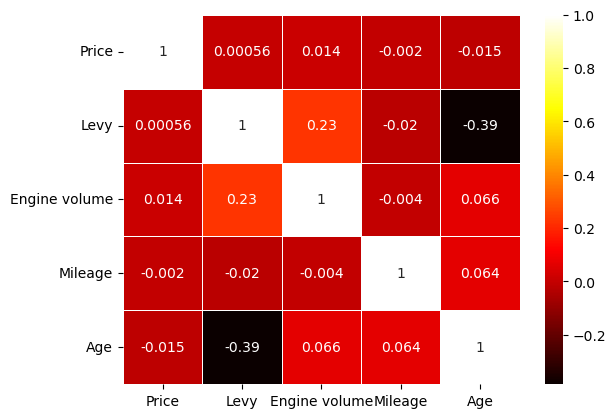

In [35]:
sns.heatmap(corr, annot= True, linewidths= 0.5,cmap='hot')

plt.show()

In [36]:
numeric_data=df.select_dtypes(exclude='object').columns
numeric_data

Index(['Price', 'Levy', 'Engine volume', 'Mileage', 'Age'], dtype='object')

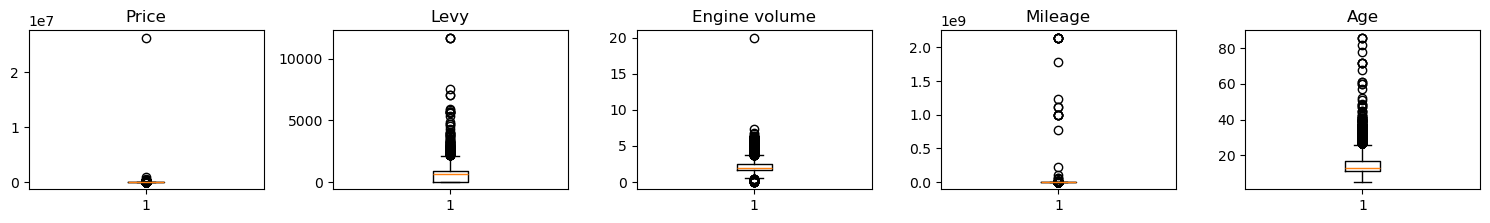

In [37]:
plt.figure(figsize=(15, 10))  
for col, i in enumerate(numeric_data, start=1):
    plt.subplot(5, 5, col)
    plt.boxplot(df[i])
    plt.title(i) 
    plt.tight_layout()

plt.show()

In [38]:
for j in numeric_data:  
    data = df[j]  
    q1 = np.percentile(data, 25)  
    q3 = np.percentile(data, 75)  
    IQR = q3 - q1  
    lb = q1 - 1.5 * IQR  
    ub = q3 + 1.5 * IQR  
    cap = []
    for i in data:
        if i < lb:
            cap.append(lb) 
        elif i > ub:
            cap.append(ub)  
        else:
            cap.append(i)  
    
   
    df[j] = cap

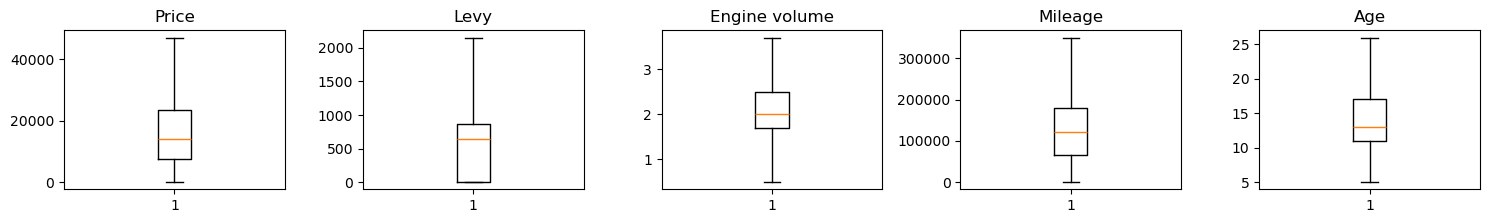

In [39]:
plt.figure(figsize=(15, 10))  
for col, i in enumerate(numeric_data, start=1):
    plt.subplot(5, 5, col)
    plt.boxplot(df[i])
    plt.title(i) 
    plt.tight_layout()

plt.show()

In [40]:
df

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,13328.0,1399.0,LEXUS,other,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,15.0
1,16621.0,1018.0,CHEVROLET,other,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,14.0
2,8467.0,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,19.0
3,3607.0,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,14.0
4,11726.0,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470.0,645.0,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,307325.0,4.0,Automatic,Front,4,Left wheel,Silver,12,14.0
19232,8467.0,0.0,MERCEDES-BENZ,other,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2,Left wheel,Silver,5,26.0
19233,15681.0,831.0,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4,Left wheel,Red,8,14.0
19234,26108.0,836.0,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,4,Left wheel,Grey,4,15.0


In [41]:
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
numeric_data

Index(['Price', 'Levy', 'Engine volume', 'Mileage', 'Age'], dtype='object')

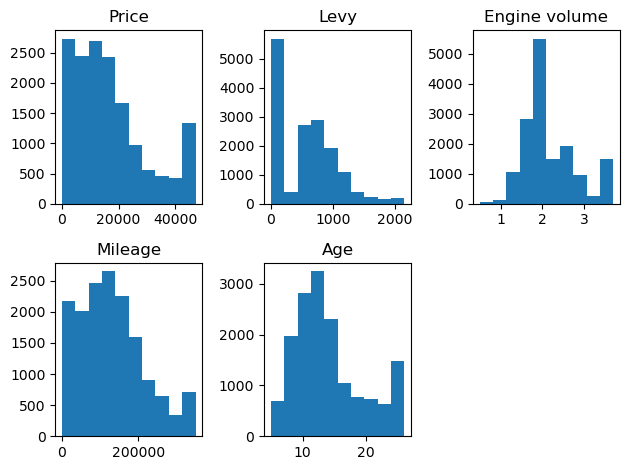

In [44]:
for i, col in enumerate(numeric_data, start=1):
    plt.subplot(2, 3, i)  
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout()  
plt.show()

In [45]:
df['Price'] = np.sqrt(df['Price'])

In [46]:
df['Mileage'] = np.sqrt(df['Mileage'])

In [47]:
df['Age'] = np.log(df['Age'] + 1)  

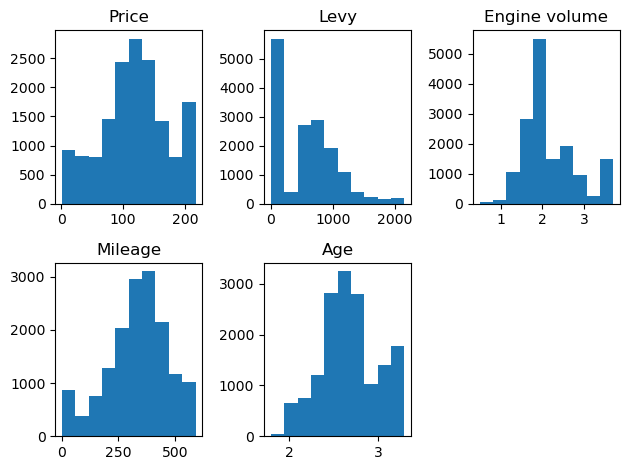

In [48]:
for i, col in enumerate(numeric_data, start=1):
    plt.subplot(2, 3, i)  
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout()  
plt.show()

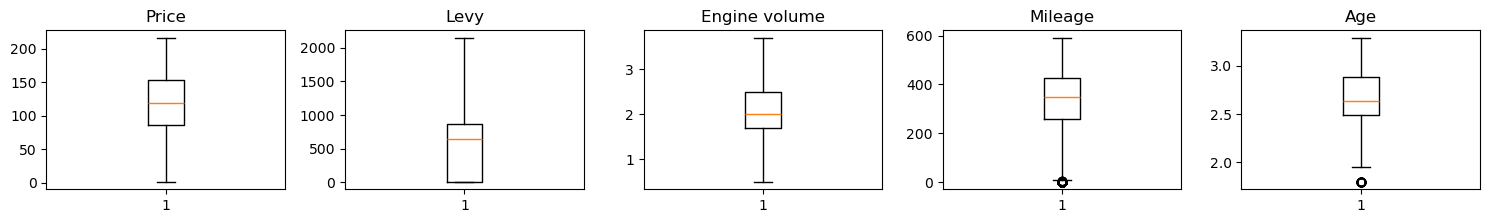

In [49]:
plt.figure(figsize=(15, 10))  
for col, i in enumerate(numeric_data, start=1):
    plt.subplot(5, 5, col)
    plt.boxplot(df[i])
    plt.title(i) 
    plt.tight_layout()

plt.show()

In [50]:
for i in numeric_data:
    data = df[i]  
    Q1 = np.percentile(data, 25)  
    Q3 = np.percentile(data, 75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR 
    outliers = (data < lower_bound) | (data > upper_bound)
    outlier_percentage = (outliers.sum() / len(data)) * 100 
    print(f"Percentage of outliers in column '{i}': {outlier_percentage:.2f}%")

Percentage of outliers in column 'Price': 0.00%
Percentage of outliers in column 'Levy': 0.00%
Percentage of outliers in column 'Engine volume': 0.00%
Percentage of outliers in column 'Mileage': 3.89%
Percentage of outliers in column 'Age': 0.27%


In [51]:
    data = df['Mileage']  
    q1 = np.percentile(data, 25)  
    q3 = np.percentile(data, 75)  
    IQR = q3 - q1  
    lb = q1 - 1.5 * IQR  
    ub = q3 + 1.5 * IQR  
    cap = []
    for i in data:
        if i < lb:
            cap.append(lb) 
        elif i > ub:
            cap.append(ub)  
        else:
            cap.append(i)  

    df['Mileage'] = cap

{'whiskers': [<matplotlib.lines.Line2D at 0x2cd1559d760>,
 'caps': [<matplotlib.lines.Line2D at 0x2cd1559c200>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cd1559d7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cd1559e540>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cd1559e750>],
 'means': []}

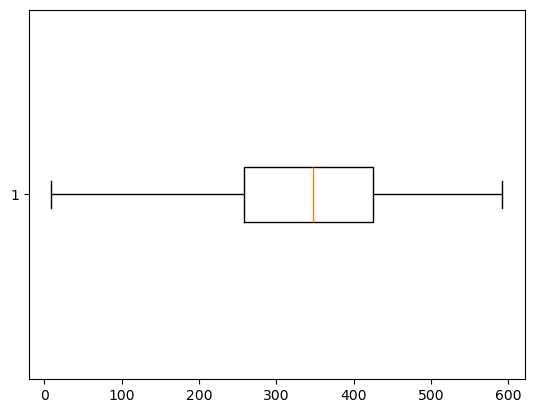

In [52]:
plt.boxplot(df['Mileage'],vert=False)

(array([ 896.,  423.,  803., 1279., 2146., 2890., 3006., 2117., 1150.,
        1015.]),
 array([  8.6571893 ,  66.96388793, 125.27058657, 183.5772852 ,
        241.88398383, 300.19068246, 358.49738109, 416.80407972,
        475.11077835, 533.41747698, 591.72417561]),
 <BarContainer object of 10 artists>)

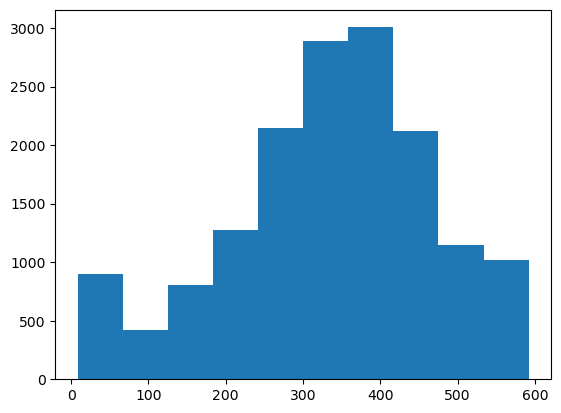

In [53]:
plt.hist(df['Mileage'])

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib


scalar = StandardScaler()
df[numeric_data] = scalar.fit_transform(df[numeric_data])


with open("StandardScaler.joblib", "wb") as encoders_file:
    joblib.dump(scalar, encoders_file)
    
loaded_scalers = joblib.load("StandardScaler.joblib")

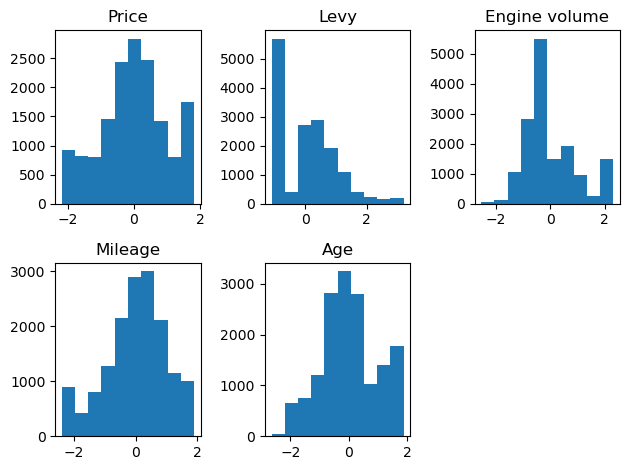

In [55]:
for i, col in enumerate(numeric_data, start=1):
    plt.subplot(2, 3, i)  
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout()  
plt.show()

In [56]:
from sklearn.preprocessing import LabelEncoder
import joblib
label_encoders = {}
for i in cat_col:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])
    label_encoders[i] = encoder
with open("label_encoders.joblib", "wb") as encoders_file:
    joblib.dump(label_encoders, encoders_file)

In [57]:
df

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,-0.065672,1.697650,10,40,4,1,2,2.017261,0.709369,5,0,0,1,0,12,12,0.311072
1,0.182913,0.933768,2,40,4,0,5,1.259695,0.760028,5,2,0,1,0,1,8,0.116717
2,-0.497902,-1.107260,6,12,3,0,5,-1.316032,0.826412,3,3,1,1,1,1,2,0.983060
3,-1.087437,0.620997,5,11,4,1,2,0.502128,0.560752,3,0,0,1,0,14,0,0.116717
4,-0.197760,-0.213057,6,12,3,1,5,-1.316032,-0.232015,3,0,1,1,0,12,4,-0.555271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,-1.795418,0.185925,18,29,3,1,2,-0.558465,1.613687,3,0,1,1,0,12,12,0.116717
19232,-0.497902,-1.107260,12,40,1,1,0,-0.255438,1.564855,3,1,2,0,0,12,5,1.886813
19233,0.114683,0.558844,7,34,9,1,5,0.350615,0.494190,3,2,1,1,0,11,8,0.116717
19234,0.785347,0.568869,7,37,4,1,1,-0.255438,0.046962,3,0,1,1,0,7,4,0.311072


<Figure size 1500x500 with 0 Axes>

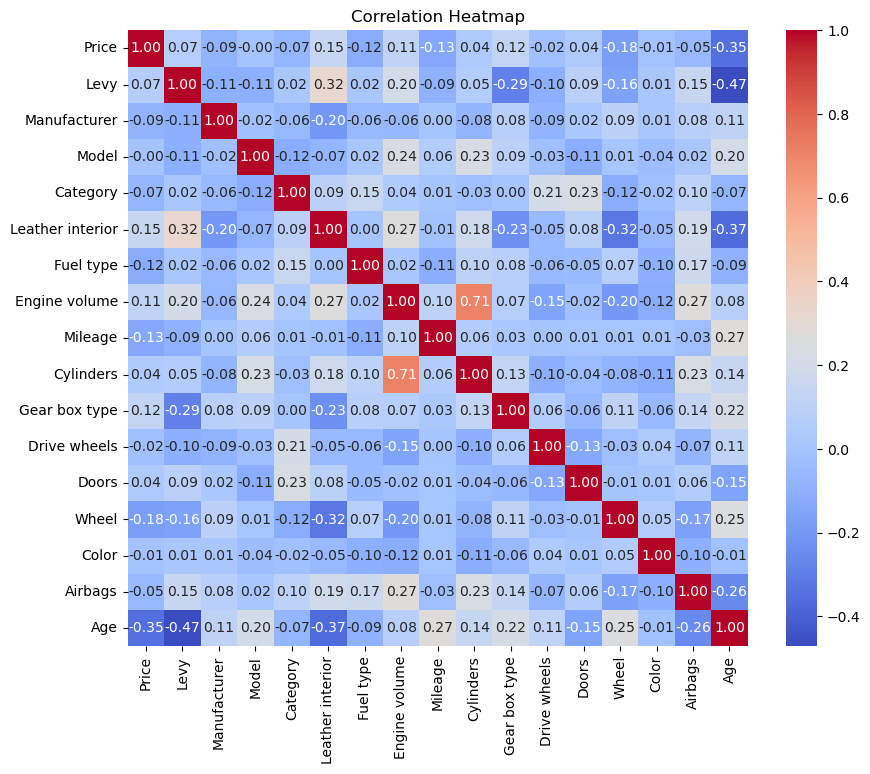

In [58]:
plt.figure(figsize=(15,5))
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# feature selection

In [59]:
from sklearn.feature_selection import VarianceThreshold
X=df.drop('Price',axis=1)
y=df['Price']

In [60]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

             feature        VIF
0              const  67.299643
1               Levy   1.501473
2       Manufacturer   1.096498
3              Model   1.140821
4           Category   1.225804
5   Leather interior   1.455512
6          Fuel type   1.135042
7      Engine volume   2.464578
8            Mileage   1.111494
9          Cylinders   2.161243
10     Gear box type   1.218291
11      Drive wheels   1.167355
12             Doors   1.140576
13             Wheel   1.224871
14             Color   1.033434
15           Airbags   1.308687
16               Age   1.852081


In [61]:
#variance threshold 
variances = X.var(axis=0)
feature_variances = pd.DataFrame({
    'Feature': X.columns,
    'Variance': variances
}).sort_values(by='Variance', ascending=True)

print(feature_variances)

                           Feature    Variance
const                        const    0.000000
Doors                        Doors    0.053765
Wheel                        Wheel    0.082778
Leather interior  Leather interior    0.220631
Drive wheels          Drive wheels    0.298563
Gear box type        Gear box type    0.897616
Mileage                    Mileage    1.000064
Age                            Age    1.000064
Engine volume        Engine volume    1.000064
Levy                          Levy    1.000064
Cylinders                Cylinders    1.231811
Fuel type                Fuel type    3.293742
Category                  Category    7.935569
Airbags                    Airbags   16.546408
Color                        Color   28.349605
Manufacturer          Manufacturer   36.532625
Model                        Model  176.564282


In [62]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0.3)
vt.fit(X)
vt.variances_
vt.get_support()
cols=vt.get_feature_names_out()
X[cols]

,Levy,Manufacturer,Model,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Color,Airbags,Age
0,1.697650,10,40,4,2,2.017261,0.709369,5,0,12,12,0.311072
1,0.933768,2,40,4,5,1.259695,0.760028,5,2,1,8,0.116717
2,-1.107260,6,12,3,5,-1.316032,0.826412,3,3,1,2,0.983060
3,0.620997,5,11,4,2,0.502128,0.560752,3,0,14,0,0.116717
4,-0.213057,6,12,3,5,-1.316032,-0.232015,3,0,12,4,-0.555271
...,...,...,...,...,...,...,...,...,...,...,...,...
19230,0.185925,18,29,3,2,-0.558465,1.613687,3,0,12,12,0.116717
19232,-1.107260,12,40,1,0,-0.255438,1.564855,3,1,12,5,1.886813
19233,0.558844,7,34,9,5,0.350615,0.494190,3,2,11,8,0.116717
19234,0.568869,7,37,4,1,-0.255438,0.046962,3,0,7,4,0.311072


In [63]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
model = LinearRegression()
sfs = SequentialFeatureSelector(model, direction='forward', scoring='r2', cv=5, n_features_to_select=10)
sfs.fit(X, y)
selected_features = X.columns[sfs.get_support()]
print("Selected Features (Forward Selection):\n", selected_features)

Selected Features (Forward Selection):
 Index(['Levy', 'Category', 'Fuel type', 'Engine volume', 'Mileage',
       'Gear box type', 'Drive wheels', 'Wheel', 'Airbags', 'Age'],
      dtype='object')


In [64]:
sbs = SequentialFeatureSelector(model, direction='backward', scoring='r2', cv=5, n_features_to_select=10)
sbs.fit(X, y)
selected_features = X.columns[sbs.get_support()]
print("Selected Features (Backward Elimination):\n", selected_features)

Selected Features (Backward Elimination):
 Index(['Levy', 'Category', 'Fuel type', 'Engine volume', 'Mileage',
       'Gear box type', 'Drive wheels', 'Wheel', 'Airbags', 'Age'],
      dtype='object')


In [65]:
from sklearn.feature_selection import SelectKBest, f_regression
k = 10  
selector = SelectKBest(score_func=f_regression, k=k)
X_reduced = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Top Features:\n", selected_features)

Top Features:
 Index(['Levy', 'Manufacturer', 'Category', 'Leather interior', 'Fuel type',
       'Engine volume', 'Mileage', 'Gear box type', 'Wheel', 'Age'],
      dtype='object')


In [66]:
df.drop('Wheel',axis=1,inplace=True)
df.drop('Doors',axis=1,inplace=True)
df.drop('Drive wheels',axis=1,inplace=True)
df.drop('Color',axis=1,inplace=True)
df.drop('Cylinders',axis=1,inplace=True)

In [67]:
df

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Airbags,Age
0,-0.065672,1.697650,10,40,4,1,2,2.017261,0.709369,0,12,0.311072
1,0.182913,0.933768,2,40,4,0,5,1.259695,0.760028,2,8,0.116717
2,-0.497902,-1.107260,6,12,3,0,5,-1.316032,0.826412,3,2,0.983060
3,-1.087437,0.620997,5,11,4,1,2,0.502128,0.560752,0,0,0.116717
4,-0.197760,-0.213057,6,12,3,1,5,-1.316032,-0.232015,0,4,-0.555271
...,...,...,...,...,...,...,...,...,...,...,...,...
19230,-1.795418,0.185925,18,29,3,1,2,-0.558465,1.613687,0,12,0.116717
19232,-0.497902,-1.107260,12,40,1,1,0,-0.255438,1.564855,1,5,1.886813
19233,0.114683,0.558844,7,34,9,1,5,0.350615,0.494190,2,8,0.116717
19234,0.785347,0.568869,7,37,4,1,1,-0.255438,0.046962,0,4,0.311072


In [68]:
X=df.drop('Price',axis=1)
y=df['Price']

In [69]:
X

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Airbags,Age
0,1.697650,10,40,4,1,2,2.017261,0.709369,0,12,0.311072
1,0.933768,2,40,4,0,5,1.259695,0.760028,2,8,0.116717
2,-1.107260,6,12,3,0,5,-1.316032,0.826412,3,2,0.983060
3,0.620997,5,11,4,1,2,0.502128,0.560752,0,0,0.116717
4,-0.213057,6,12,3,1,5,-1.316032,-0.232015,0,4,-0.555271
...,...,...,...,...,...,...,...,...,...,...,...
19230,0.185925,18,29,3,1,2,-0.558465,1.613687,0,12,0.116717
19232,-1.107260,12,40,1,1,0,-0.255438,1.564855,1,5,1.886813
19233,0.558844,7,34,9,1,5,0.350615,0.494190,2,8,0.116717
19234,0.568869,7,37,4,1,1,-0.255438,0.046962,0,4,0.311072


# Train Test Split

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1234)

In [71]:
X_train.shape,X_test.shape

((11793, 11), (3932, 11))

# Model train

In [72]:
reg = GradientBoostingRegressor(random_state=1234)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1234)

# Model Evaluate

In [77]:
y_pred=reg.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.44824882915638165
Mean Squared Error (MSE): 0.3995100413519963
Root Mean Squared Error (RMSE): 0.6320680670244276
R² Score: 0.5998830505598416


In [76]:
y_pred2=reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.443526898572382
Mean Squared Error (MSE): 0.3917588041829448
Root Mean Squared Error (RMSE): 0.6259063861177203
R² Score: 0.6099387981344847
